# Criterion:

Identify timestamps per video that satisfy:

Video:

1. At least one face of 400-500 px size

2. Facial Movement that indicates speaking

Audio:

1. Voice detected

2. Only one simultaneous speaker, or clearly audible speaker

In [23]:
from retinaface import RetinaFace

In [2]:
# resp = RetinaFace.detect_faces("img3.jpg")

In [24]:
import cv2
import matplotlib.pyplot as plt

# Path to your video file
video_path = 'vid_test.mp4'

# Open the video
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frames = []
frame_rate = cap.get(cv2.CAP_PROP_FPS)  # Get the frame rate of the video
interval = int(frame_rate / 10)  # Calculate the interval for 0.1 second frames

current_frame = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if there are no frames to read
    
    # Capture a frame every tenth of a second
    if current_frame % interval == 0:
        frames.append(frame)
    
    current_frame += 1

cap.release()  # Release the video capture object

# Display a specific frame
# Ensure that the frame index exists in the captured frames list

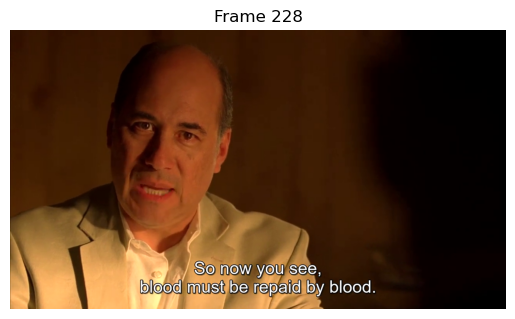

In [34]:
frame_to_display = frames[1400]
# Convert BGR to RGB
frame_to_display_rgb = cv2.cvtColor(frame_to_display, cv2.COLOR_BGR2RGB)

plt.imshow(frame_to_display_rgb)
plt.title('Frame 228')
plt.axis('off')  # Hide axis
plt.show()

In [38]:
import cv2
from retinaface import RetinaFace
import os

# Function to save frame as temporary file
def save_temp_frame(frame, filename="temp_frame.jpg"):
    cv2.imwrite(filename, frame)
    return filename

temp_filename = save_temp_frame(frames[1400])

# Use RetinaFace for face detection
resp = RetinaFace.detect_faces(temp_filename)

# Release the video capture object
cap.release()


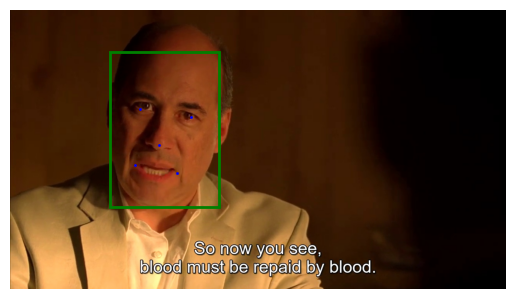

In [39]:
import cv2
from matplotlib import pyplot as plt

# Load the image
image_path = temp_filename
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Define bounding boxes and landmarks data
faces = resp

# Plotting
fig, ax = plt.subplots()
ax.imshow(img_rgb)

# Draw bounding boxes and landmarks
for face in faces.values():
    # Bounding box
    x1, y1, x2, y2 = face['facial_area']
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='green', linewidth=2)
    ax.add_patch(rect)
    
    # Landmarks
    for landmark, point in face['landmarks'].items():
        ax.plot(point[0], point[1], marker='o', markersize=1, color='blue')

ax.axis('off')  # Hide axes
plt.show()


In [40]:
area_req = 500
filtered_dict = {key: value for key, value in resp.items() if (value['facial_area'][2] - value['facial_area'][0]) * (value['facial_area'][3] - value['facial_area'][1]) > 500}

print(filtered_dict)

{'face_1': {'score': 0.998814582824707, 'facial_area': [258, 109, 539, 507], 'landmarks': {'right_eye': [334.2615, 253.81467], 'left_eye': [466.30975, 275.61966], 'nose': [383.28394, 346.68793], 'mouth_right': [321.98703, 400.2654], 'mouth_left': [429.21634, 418.98703]}}}


In [20]:
if os.path.exists(temp_filename):
         os.remove(temp_filename)

In [1]:
from moviepy.editor import *

# Load your video file
video = VideoFileClip('vid_test.mp4')

# Extract the audio
audio = video.audio

# Save the audio to a WAV file
audio.write_audiofile('vid_test.wav')

MoviePy - Writing audio in vid_test.wav


MoviePy - Done.


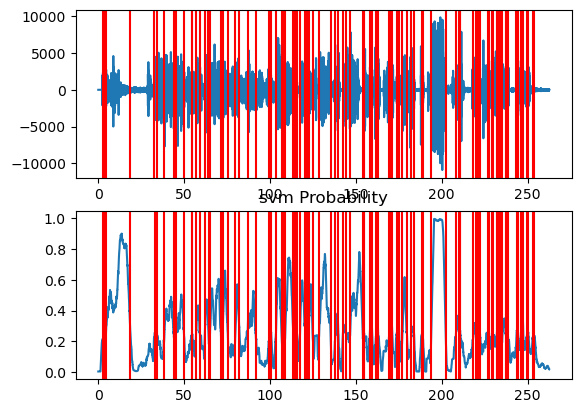

[[2.98, 3.8200000000000003], [4.4, 18.76], [32.74, 34.2], [38.480000000000004, 43.96], [45.12, 49.88], [54.6, 54.82], [56.88, 59.2], [61.980000000000004, 64.18], [65.02, 71.4], [72.38, 75.44], [79.82000000000001, 82.22], [86.96000000000001, 91.7], [99.5, 100.72], [103.44, 106.74000000000001], [107.8, 108.06], [108.84, 113.5], [114.48, 115.76], [117.46000000000001, 120.64], [120.7, 121.3], [121.96000000000001, 122.38], [122.46000000000001, 124.78], [128.58, 135.24], [137.96, 139.84], [142.4, 144.28], [146.64000000000001, 154.0], [154.46, 154.92000000000002], [158.1, 159.48], [161.78, 162.96], [169.36, 169.76], [170.6, 171.26], [173.72, 175.20000000000002], [177.0, 179.72], [182.36, 183.88], [188.24, 188.88], [193.84, 202.26], [208.22, 210.14000000000001], [210.44, 210.76], [218.28, 219.82], [221.20000000000002, 222.24], [226.72, 227.54], [229.46, 230.06], [232.04, 232.38], [232.62, 233.76], [235.32, 237.32], [237.5, 238.34], [243.52, 244.48000000000002], [246.20000000000002, 247.4800000

In [21]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
from pyAudioAnalysis import audioSegmentation as aS
import matplotlib.pyplot as plt

# Load your audio file
file_path = 'vid_test.wav'
[Fs, x] = audioBasicIO.read_audio_file(file_path)

# Perform voice activity detection
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window=2.0, weight=0.3, plot=True)

# The `segments` variable contains the start and end times of speech segments
print(segments)

In [22]:
from pydub import AudioSegment

# Load the extracted audio as before
full_audio = AudioSegment.from_wav('vid_test.wav')

min_duration_sec = 3

# Filter out segments shorter than 3 seconds and calculate durations
filtered_segments = [(s[1] - s[0], s) for s in segments if (s[1] - s[0]) >= 0]

# Sort the segments by duration, descending
sorted_filtered_segments = sorted(filtered_segments, key=lambda x: x[0], reverse=True)

num_segments_to_process = 15

# Initialize a list for validated segments
validated_segments = []

for duration, (start, end) in sorted_filtered_segments:
    # Adjust the start and end times to milliseconds and apply rounding
    start_ms = round(start * 1000, -1)  # Round to nearest 10 ms
    end_ms = round(end * 1000, -1)
    
    # Ensure segment is within audio bounds and has a valid duration
    if 0 <= start_ms < end_ms <= len(full_audio):
        segment_duration = (end_ms - start_ms) / 1000.0
        if segment_duration >= min_duration_sec:
            validated_segments.append((start, end))
            if len(validated_segments) == num_segments_to_process:
                break

# Proceed with extraction and saving of validated segments
for i, (start, end) in enumerate(validated_segments):
    start_ms = round(start * 1000, -1)
    end_ms = round(end * 1000, -1)
    segment_audio = full_audio[start_ms:end_ms]
    
    # Save the segment, already validated for duration and logical correctness
    try:
        segment_audio.export(f'longest_filtered_segment_{i+1}.wav', format='wav')
    except Exception as e:
        print(f"Error exporting segment {i+1}: {e}")



In [16]:
sorted_filtered_segments

[(14.880000000000003, [4.04, 18.92]),
 (7.899999999999977, [194.20000000000002, 202.1]),
 (4.659999999999997, [128.66, 133.32]),
 (3.920000000000016, [146.44, 150.36]),
 (3.8599999999999994, [109.58, 113.44]),
 (3.3400000000000034, [150.54, 153.88]),
 (3.260000000000005, [67.94, 71.2]),
 (3.1599999999999966, [103.36, 106.52]),
 (3.019999999999996, [40.7, 43.72]),
 (2.8999999999999986, [46.86, 49.76]),
 (2.6599999999999966, [117.48, 120.14]),
 (2.6400000000000006, [72.48, 75.12]),
 (2.5600000000000023, [56.9, 59.46]),
 (2.359999999999985, [208.08, 210.44]),
 (2.280000000000001, [177.18, 179.46]),
 (2.260000000000005, [89.14, 91.4]),
 (2.180000000000007, [79.92, 82.10000000000001]),
 (2.019999999999996, [122.68, 124.7]),
 (1.8799999999999955, [65.28, 67.16]),
 (1.8799999999999955, [235.46, 237.34]),
 (1.779999999999994, [62.300000000000004, 64.08]),
 (1.740000000000002, [38.56, 40.300000000000004]),
 (1.6599999999999966, [138.22, 139.88]),
 (1.6599999999999966, [246.0, 247.66]),
 (1.5200

In [46]:
from deepface import DeepFace
face_objs = DeepFace.extract_faces(img_path = "img3.jpg", 
        target_size = (224, 224), 
)

In [47]:
!pip install scenedetect[opencv]

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 117.1/117.1 kB 6.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [49]:
from scenedetect import detect, AdaptiveDetector, split_video_ffmpeg
scene_list = detect('vid_test.mp4', AdaptiveDetector())
split_video_ffmpeg('vid_test.mp4', scene_list)

0